In [1]:
is_colab = True

# Дипломный проект
Интеллектуальная система оптимизации ценообразования услуг частного медицинского центра.

# Этапы работы

1. Цель
1. Задачи
1. Введение
1. Модели
1. Выбор метрики оценивания
1. Осмотр данных
1. Наивная модель
1. EDA
1. Корреляционный анализ
1. Обучение 
1. Выводы
1. Итоги


# Цели
1. Изучить задачу оптимизации цены с точки зрения бизнеса.
1. Разработать модель машинного обучения, прогнозирующую величину продаж услуг для использования в интеллектуальной системе ценовой оптимизации частного медицинского центра.

# Задачи
- Выбрать метрику оценивания;
- Собрать данные из внутренних и внешних источников;
- Осмотреть данные;
- Разработать наивную модель;
- Провести EDA;
- Разработать и протестировать различные модели.
- Выбрать финальную модель и проанализировать некоторые услуги по предсказаниям выбранной модели.

# Введение

Любой алгоритм ценовой оптимизации должен каким-либо
образом моделировать функцию спроса, а затем использовать эту
смоделированную функцию для расчета оптимальных цен.

В условиях реального медицинского центра получить данные о кривой спроса не представляется возможным, ведь спрос на получение медицинских услуг зависит от демографических, социальных и экономических особенностей потребителя. Собрать достоверные данные за достаточно большой период весьма сложно. Однако, реальный спрос можно заменить количеством продаж услуг и смоделировать его зависимость от изменения цен и других внешних и внутренних факторов, что и было выполнено в данной работе.

#  Модели
Для поставленной цели были выбраны модели на основе градиентного бустинга потому что по заявлениям большинства практикующих Data Scientist'ов данные модели лучше всего справляются с задачей предсказания спроса.

# Выбор метрики оценивания

Т.к. предстоит решать задачу регрессии то для оценки предсказательной способности модели я выбрал метрику RMSE - корень из средне-квадратической ошибки.

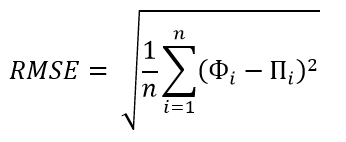


Чтобы видеть куда смещён прогноз относительно фактических значений и на сколько процентов я выбрал метрику MPE - средняя процентная ошибка. Если MPE отрицательна - модель завышает прогноз, если положительна - модель занижает прогноз. Стремится к 0.

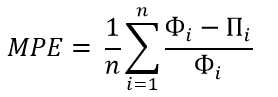


# Загрузка библиотек

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 2.2 MB/s 


In [4]:
!pip install lightgbm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [6]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 149 kB/s
     |████████████████████████████████| 297 kB 2.1 MB/s 
     |████████████████████████████████| 102 kB 44.6 MB/s 
     |████████████████████████████████| 690 kB 32.1 MB/s 
     |████████████████████████████████| 4.7 MB 41.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 29.2 MB/s 
     |████████████████████████████████| 296 kB 44.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.1-py2.py3-none-any.whl size=310107 sha256=b67ea9966cc3bb9c97e7a5bcb41220cfc97b2be49e722a00e5b7a56ea79d398a
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1k5xkk2/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f283536b5fe4b23d7d7c08b4b1576e8ca942848006eaf98261430883849b0955
  Stored in director

# Импорты

In [8]:
import os
import sys
import math
import numpy as np
import pandas as pd
import random
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_profiling

from math import sqrt
from pprint import pprint
from feature_engine.creation import CyclicalFeatures

from datetime import (
    date,
    datetime,
    timedelta,
)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


# LightGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor
# CatBoost
import catboost as cb
from catboost import CatBoostRegressor

# plt
import matplotlib.pyplot as plt
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#pandas set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

import warnings
warnings.filterwarnings("ignore")

# Версии

In [9]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)

Python       : 3.7.14 (default, Sep  8 2022, 00:06:44) 
Numpy        : 1.21.6


Фиксируем пакеты

In [10]:
!pip freeze > requirements.txt

# Константы

In [11]:
TEST_SIZE            = 0.25  # размер тестовой выборки
RANDOM_SEED          = 13    # фиксируем сид для воспроизводимости экспериментов

# Вспомогательные функции и методы

In [12]:
def rmse(y_test, y_pred):
    return np.round(sqrt(mean_squared_error(y_test, y_pred)), 2)

def mpe(y_test, y_pred):
    return f'{np.round(np.mean((y_test - y_pred) / y_test) * 100, 2)}%'


In [13]:
def moving_average(df, window): 
    id_col, date_col, target_col, predicted_col = df.columns
    res_df = pd.DataFrame(columns=df.columns)

    for s_id in list(df[id_col].unique()):
        temp_df = pd.DataFrame(columns=df.columns)
        series_curr_id = df.loc[df[id_col] == s_id]
        temp_df[id_col] = series_curr_id[id_col]
        temp_df[date_col] = series_curr_id[date_col]
        temp_df[target_col] = series_curr_id[target_col]
        temp_df[predicted_col] = round(series_curr_id[target_col].rolling(
            window=window).mean())
        res_df = pd.concat([res_df, temp_df])
        res_df.dropna(inplace=True)
        res_df[predicted_col] = np.int64(res_df[predicted_col])

    return res_df


In [14]:
def show_predicts(df):
    fig = go.Figure()

    fig.add_traces(go.Scatter(x=df.index,
                              y=df['test'],
                              mode='markers',
                              name='Фактические')
    )

    fig.add_traces(go.Scatter(x=df.index,
                              y=df['pred'],
                              mode='markers',
                              name='Предсказанные')
    )

    fig.update_layout(title='Фактические и предсказанные значения',
                      hovermode="x",)
    fig.update_traces(hoverinfo="all")

    fig.show()


In [15]:
def draw_pair_graph(df, list_col_names, range='2 month'):
    id_col_name, x_axis_name, y1_axis_name, y2_axis_name = list_col_names
  
    start_id = list(df[id_col_name])[0]
    loc_df = df.loc[df[id_col_name] == start_id]
    x_values = list(loc_df[x_axis_name])
    y1_values = list(loc_df[y1_axis_name])
    y2_values = list(loc_df[y2_axis_name])

    date_series = df.loc[df[id_col_name] == start_id][x_axis_name]
    end_date_range = list(date_series)[-1]

    if range == '2 month':
        start_date_range = end_date_range - np.timedelta64(2, 'M')
    elif range == '6 month':
        start_date_range = end_date_range - np.timedelta64(6, 'M')
    elif range == '1 year':
        start_date_range = end_date_range - np.timedelta64(1, 'Y')
    elif range == 'all':
        start_date_range = list(date_series)[0]
    else:
        print('invalid default range.\n' \
        'Default range can be one of:\n' \
        '"2 month"\n' \
        '"6 month"\n' \
        '"all"')
        return

    fig = go.Figure()

    fig.add_traces(go.Scatter(x=x_values,
                              y=y1_values,
                              name=y1_axis_name,
                              mode='markers')
    )
    fig.add_traces(go.Scatter(x=x_values, 
                              y=y2_values,
                              name=y2_axis_name)
    )

    fig.update_layout(
        xaxis=dict(
            range=list([start_date_range, end_date_range]),
            rangeselector=dict(
                buttons=list([
                    dict(count=2,
                         label="2 month",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6 month",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1 year",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                    ]), 
                ),
            rangeslider=dict(
                visible=True
                ),
            type="date"
            )
    )

    fig.show()


# Сбор данных

Код сбора данных приложен в файле get_data.ipynb

# Загружаем данные

In [16]:
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')

    ROOT_PATH = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/diplom')
    DATA_PATH = os.path.join(ROOT_PATH, 'data')
    MODEL_PATH = os.path.join(ROOT_PATH, 'model_saves')
else:
    # Kaggle
    DATA_PATH = os.path.abspath('../input/diplom-data')
    MODEL_PATH = os.path.join('./', 'model-saves')



Mounted at /content/drive


In [17]:
df = pd.read_csv(os.path.join(DATA_PATH, 'dataset.csv'), sep=';')

In [18]:
raise KeyboardInterrupt

KeyboardInterrupt: ignored

# Осмотр данных


Посмотрим пример данных

In [ ]:
display(df.sample(5))

Размер датасета

In [ ]:
print('Размер:', df.shape)

Основные статистики


In [ ]:
print(df.describe())

Общая информация

In [ ]:
display(df.info())

Уникальные значения

In [ ]:
display(df.nunique())

# Описание данных
Название | Описание | Тип признака
--- | --- | ---
service_id | id услуги | Категориальный 
cost | цена | Числовой
name | название услуги | Категориальный 
item_code | стандартизированный код услуги | Категориальный 
medical_specialty | медицинская специальность | Категориальный 
amount_doctors | количество врачей, принимающих в этот день | Числовой
service_date | дата оказания услуги в формате строки вида дд.мм.гггг | Категориальный 
sales | спрос | Числовой
service_type | номенклатурная группа услуги | Категориальный 
weekend | триггер календарного выходного дня | Бинарный
weekday | день недели в сокращённом формате | Категориальный 
holiday | триггер праздничного дня по данным производственных календарей | Бинарный
season | время года | Категориальный 
unique_service | триггер услуги, оказываемой только в нашем МЦ | Бинарный
pandemic | триггер эпидемиологической ситуации по данным ВОЗ | Бинарный
month | название месяца в сокращённом формате | Категориальный 

Датасет содержит данные об услугах продажах этих услуг и дополнительные внешние данные о 195 услугах.

# Предварительная обработка

Преобразование service_date в datetime и настроим типы данных для остальных признаков

In [ ]:
df['service_date'] = pd.to_datetime(df['service_date'], format='%d.%m.%Y')

Определение типов признаков

In [ ]:
cat_feats = ['service_id', 'name', 'item_code', 'medical_specialty', 
             'service_date', 'service_type', 'weekday', 'season', 'month']
df[cat_feats] = df[cat_feats].astype("category")

bool_feats = ['weekend', 'holiday', 'unique_service', 'pandemic']
df[bool_feats] = df[bool_feats].astype("boolean")

In [ ]:
df.info()

# Наивная модель

В качестве наивной модели я решил взять простую линейную регрессию.  
Несмотря на простоту, эта модель может быть хорошей отправной точкой.



In [ ]:
X = df[['cost', 'amount_doctors']]
y = df['sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                    shuffle=True, 
                                                    random_state=RANDOM_SEED)

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train, np.log(y_train))

In [ ]:
y_pred = np.round(np.exp(regressor.predict(X_test)))

print(f"RMSE: {rmse(y_test, y_pred)}")
print(f"MPE: {mpe(y_test, y_pred)}")

# Графики реального и предсказанного спроса

In [ ]:
show_predicts(pd.DataFrame({'test': y_test.values, 'pred':y_pred}))


Величина отклонения прогноза довольна небольшая и модель справляется с задачей лучше, чем если бы я прогнозировал продажи случайным числом, но явно есть куда улучшать модель.

# EDA

## Изучим данные поближе

In [ ]:
pandas_profiling.ProfileReport(df)

В данных слишком много записей из номенклатурной группы Анализы. Вероятно эти записи будут иметь сильное влияние на результат моделей. Полагаю, нужно собирать данные в отдельности для каждой номенклатурной группы и обучать свою модель для каждой категории номенклатурной группы.

Подавляющее большинство записей относится к медицинской специальности Клиническая лабораторная диагностика. Это почти все записи из категории Анализы. Данный факт является ещё одним подтверждением того, что нужно разделять данные на разные датасеты по номенклатурным группам.

Величина продаж порядка 80 единиц, вероятно, принадлежит записям категории Анализы. Эти значения помешают алгоритму выявить закономерности в данных. Логарифмирую таргет.

Данных за выходные дни значительно меньше чем за будние дни. Вероятно это связанно с расписанием работы врачей.

Признак holiday показывает что в праздничные дни и дни с сокращённым рабочим дням есть спрос на некоторые услуги.

Признаки item_code и name совпадают, значит стандартизированный код для каждой отдельной услуги уникален. Т.к. название услуги с большей вероятностью может быть изменено по какой либо причине оставим в данных признак item_code.

## Корреляционный анализ
Кор. анализ показал что продажи имеют выраженную корреляцию с количеством врачей и медицинской специальностью услуги. В данном случае это ожидаемо и может означать, что чем больше врачей, оказывающих одну и ту же услугу, тем больше продаж по этой услуге, и, также, естественным образом, продажи разнятся по медицинским специальностям.

# Посмотрим как спрос зависит от различных признаков на примере одной конкретной услуги.

## Спрос на оду услугу по сезонам, месяцам, дням недели.

In [ ]:
analyze_df = df.loc[df['service_id'] == 3100]

### Сезоны

In [ ]:
temp_df = analyze_df[['sales']]
temp_df['season.year'] = df.apply(lambda row: f'{row["season"]}.\
{row["service_date"].year}',axis=1)
dates_list = temp_df['season.year'].unique()
temp_df = temp_df.groupby(['season.year']).sum().reindex(dates_list)

fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['sales'])
)

fig.update_layout(title='Динамика спроса по временам года')

fig.show()

temp_df = None

### Месяцы

In [ ]:
temp_df = analyze_df[['sales']]
temp_df['month.year'] = df.apply(lambda row: f'{row["month"]}.\
{row["service_date"].year}',axis=1)
dates_list = temp_df['month.year'].unique()
temp_df = temp_df.groupby(['month.year']).sum().reindex(dates_list)

fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['sales'])
)

fig.update_layout(title='Динамика спроса по месяцам за весь период')

fig.show()

temp_df = None



### Дни недели

In [ ]:
dates_list = ['Mon.2017', 'Tue.2017', 'Wed.2017', 'Thu.2017', 'Fri.2017', 'Sat.2017', 'Sun.2017', 
              'Mon.2018', 'Tue.2018', 'Wed.2018', 'Thu.2018', 'Fri.2018', 'Sat.2018', 'Sun.2018', 
              'Mon.2019', 'Tue.2019', 'Wed.2019', 'Thu.2019', 'Fri.2019', 'Sat.2019', 'Sun.2019',  
              'Mon.2020', 'Tue.2020', 'Wed.2020', 'Thu.2020', 'Fri.2020', 'Sat.2020', 'Sun.2020', 
              'Mon.2021', 'Tue.2021', 'Wed.2021', 'Thu.2021', 'Fri.2021', 'Sat.2021', 'Sun.2021', 
              'Mon.2022', 'Tue.2022', 'Wed.2022', 'Thu.2022', 'Fri.2022', 'Sat.2022',  'Sun.2022']
       

In [ ]:
temp_df = analyze_df[['sales']]
temp_df['weekday.year'] = df.apply(lambda row: f'{row["weekday"]}.\
{row["service_date"].year}',axis=1)
temp_df = temp_df.groupby(['weekday.year']).sum().reindex(dates_list)

fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['sales'])
)

fig.update_layout(title='Динамика спроса по дням недели за весь период')

fig.show()

temp_df = None



## Спрос во время пандемии

In [ ]:
temp_df = analyze_df.loc[analyze_df['pandemic'] == 1][['sales']]
temp_df['month.year'] = analyze_df.apply(lambda row: f'{row["month"]}.\
{row["service_date"].year}',axis=1)
dates_list = temp_df['month.year'].unique()
temp_df = temp_df.groupby(['month.year']).sum().reindex(dates_list)

fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['sales'])
)


fig.update_layout(title='Динамика спроса по месяцам за период пандемии')

fig.show()

temp_df = None

temp_df = analyze_df.loc[analyze_df['pandemic'] == 0][['sales']]
temp_df['month.year'] = analyze_df.apply(lambda row: f'{row["month"]}.\
{row["service_date"].year}',axis=1)
dates_list = temp_df['month.year'].unique()
temp_df = temp_df.groupby(['month.year']).sum().reindex(dates_list)

fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['sales'])
)


fig.update_layout(title='Динамика спроса по месяцам до и после пандемии')

fig.show()

temp_df = None


Судя по данным графикам спрос на выбранную услугу возрос во время пандемии относительно данных до пандемии.

## Спрос и цены

*Продажи умножены на 100 для подгонки под масштаб цен*

In [ ]:
temp_df = analyze_df.copy()
temp_df['sales'] = temp_df['sales'].mul(100)

draw_pair_graph(temp_df, ['service_id', 'service_date', 'sales', 'cost'], 
                range='1 year')

temp_df = None


По данным графика видно что для данной услуги изменения цены не влияли на величину спроса.

## Спрос на уникальные услуги

- выделить все уникальные услуги
- найти среди не уникальных услуг те, которые совпадают по номенклатурной группе и мед. специальности с уникальными (по одной на каждую уникальную)
- построить графики спроса

In [ ]:
temp_df = df.loc[df['unique_service'] == 1][['sales']]
temp_df['month.year'] = df.apply(lambda row: f'{row["month"]}.\
{row["service_date"].year}',axis=1)
temp_df = temp_df.groupby(['month.year']).sum().reindex(dates_list)

fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['sales'])
)


fig.update_layout(title='Суммарный спрос по месяцам за весь период на уникальные услуги')

fig.show()

temp_df = None


По-видимому, уникальные услуги пользуются таким же спросом как и остальные услуги.

## Аномалии

In [ ]:
px.box(df, x='item_code', y='cost', title='Цены на услуги')

В правой части графика выделяется услуга с аномально высокими ценами по сравнению с остальными услугами.

Я предполагаю что услуги с такими высокими ценами стоит выделить в отдельный набор данных и обучать модель конкретно для услуг с таким ценовым диапазоном.

Логарифмирую признак.

In [ ]:
px.box(df, x='item_code', y='amount_doctors', title='Количество врачей')

Можно считать, что в данном признаке аномалий нет.

## Цикличные признаки

- Из признака service_date выделить дни и месяцы в числовом обозначении
- преобразовать признак weekday в числа от 0 до 6
- преобразовать признак season в числа от 0 до 3
- признаки day, month, weekday, season преобразовать в парные цикличные признаки с помощью CyclicalFeatures

Пример преобразования для признака month

In [ ]:
temp_df = pd.DataFrame()
temp_df['month'] = df['service_date'].apply(lambda x: x.month)

temp_df['month'] = temp_df['month'].astype("int64")

cyclical = CyclicalFeatures(variables=['month'], drop_original=True)
temp_df = cyclical.fit_transform(temp_df)


In [ ]:
fig = go.Figure()

fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['month_sin'].unique(),
                          )
)
fig.add_traces(go.Scatter(x=temp_df.index,
                          y=temp_df['month_cos'].unique()
                          )
)

fig.update_layout(title='Визуализация преобразования циклического признака')

fig.show()

temp_df = None

## Категориальные признаки

Категориальные признаки обработают сами модели.

# Финальная обработка
Объединим всю обработку датасета в одну функцию и применим её к данным.

In [ ]:
def set_day_cyclical(row):
    day = row['service_date'].day
    month = row['service_date'].month
    year = row['service_date'].year

    cyclical = CyclicalFeatures()

    if month == 2 and year == 2020:
        df_days = pd.DataFrame(pd.date_range(datetime(2020, 2, 1), datetime(2020, 2, 29)), columns=['day'])
        df_days = df_days['day'].apply(lambda x: x.day)
        df_days = cyclical.fit_transform(pd.DataFrame(df_days))

    if month in [1, 3, 5, 7, 8, 10, 12]:
        cyclical = CyclicalFeatures()
        df_days = pd.DataFrame(pd.date_range(datetime(2020, 1, 1), datetime(2020, 1, 31)), columns=['day'])
        df_days = df_days['day'].apply(lambda x: x.day)
        df_days = cyclical.fit_transform(pd.DataFrame(df_days))

    elif month in [4, 6, 9, 11]:
        df_days = pd.DataFrame(pd.date_range(datetime(2020, 4, 1), datetime(2020, 4, 30)), columns=['day'])
        df_days = df_days['day'].apply(lambda x: x.day)
        df_days = cyclical.fit_transform(pd.DataFrame(df_days))

    elif month in [2] and year != 2020:
        df_days = pd.DataFrame(pd.date_range(datetime(2021, 2, 1), datetime(2021, 2, 28)), columns=['day'])
        df_days = df_days['day'].apply(lambda x: x.day)
        df_days = cyclical.fit_transform(pd.DataFrame(df_days))

    row['day_sin'] = list(df_days.loc[df_days['day'] == day]['day_sin'])[0]
    row['day_cos'] = list(df_days.loc[df_days['day'] == day]['day_cos'])[0]

    return row

In [ ]:
def process_df(df):
    res_df = df.copy()

    season_dict = dict(winter=1, spring=2, summer=3, autumn=4)

    
    res_df.drop('name', axis=1, inplace=True)

    res_df['year'] = res_df.apply(lambda row: row["service_date"].year, axis=1)
    # все строки с данными за неполные месяцы - январь 2017 и август 2022
    loc_df = res_df.loc[(res_df['month'] == 'Jan') & 
               (res_df['year'] == 2017) | 
               (res_df['month'] == 'Aug') & 
               (res_df['year'] == 2022)]
    res_df.drop(loc_df.index, inplace=True)

    # обработка datetime признаков
    res_df['month'] = res_df['service_date'].apply(lambda x: x.month)
    res_df['weekday'] = res_df['service_date'].apply(lambda x: x.weekday)
    res_df['season'] = res_df['season'].apply(lambda x: season_dict[x])

    res_df[['month', 'weekday', 'season']] = res_df[['month', 'weekday', 'season']].astype("int64")

    cyclical = CyclicalFeatures(variables=['month', 'weekday', 'season'], drop_original=True)
    res_df = cyclical.fit_transform(res_df)

    # отдельная обработка признака day
    res_df = res_df.apply(set_day_cyclical, axis=1)

    res_df.drop(['service_date'], axis=1, inplace=True)
    
    # логарифмирование признаков с большими значениями
    res_df['year'] = np.log(res_df['year'])
    res_df['cost'] = np.log(res_df['cost'])

    # обработкой категориальных признаков займутся модели

    return res_df

In [ ]:
# train_df = process_df(df)
# display(train_df.head())

Обработка датасета занимет много времени поэтому сохраню его для быстрой загрузки в будущем.

In [ ]:
if is_colab:
    train_df.to_csv(os.path.join(DATA_PATH, 'processed_df.csv'), encoding='utf-8', index=False, sep=';')

# Разделение данных

Загрузим ранее сохранённый обработанный датасет.

In [19]:
if os.path.exists(os.path.join(DATA_PATH, 'processed_df.csv')):
    train_df = pd.read_csv(os.path.join(DATA_PATH, 'processed_df.csv'), sep=';')

cat_features = ['item_code', 'medical_specialty', 'service_type']
train_df[cat_features] = train_df[cat_features].astype("category")


In [ ]:
train_df.head()

Разделение на train и target

In [20]:
X = train_df.drop(['sales', 'service_id'], axis = 1)
y = train_df['sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                    shuffle=True, 
                                                    random_state=RANDOM_SEED)

Размеры выборок

In [23]:
print(f'Train: {X_train.shape}')
print(f'Test: {X_test.shape}')

Train: (107367, 18)
Test: (35790, 18)


Количество услуг в выборках

In [26]:
X_train.item_code.nunique()

194

In [27]:
X_test.item_code.nunique()

194

# Обучение моделей

## CatBoost

In [ ]:
# cb_model = CatBoostRegressor(iterations=100000,
#                              depth=13,
#                              learning_rate = 0.005,
#                              eval_metric='RMSE',
#                              od_wait=1000, 
#                              task_type='GPU',
#                              silent=False,
#                              l2_leaf_reg=0.15, 
#                              random_strength=0.35,
#                              cat_features=cat_features,
#                              bagging_temperature=3,
#                              min_child_samples=26,
#                           )
#
# cb_model.fit(X_train, np.log(y_train),
#                     eval_set=(X_test, np.log(y_test)),
#                     verbose_eval=100,
#                     use_best_model=True,
#                     )


In [ ]:
if is_colab:
    cb_model.save_model(os.path.join(MODEL_PATH, 'cb_model.cbm'))

In [ ]:
cb_model = CatBoostRegressor().load_model(os.path.join(MODEL_PATH, 'cb_model.cbm'))

In [ ]:
cb_predict = np.round(np.exp(cb_model.predict(X_test)))

print(f"RMSE: {rmse(y_test, cb_predict)}")
print(f"MPE: {mpe(y_test, cb_predict)}")

In [ ]:
show_predicts(pd.DataFrame({'test': y_test.values, 'pred':cb_predict}))

## LightGBM

In [ ]:
# params = {'metric' : 'RMSE',
#           'objective': 'regression',
#           'learning_rate': 0.005,
#           'boosting_type' : 'gbdt',
#           'n_jobs' : 10,
#           'num_leaves': 90,
#           'min_child_samples': 30,
#           'max_depth': 35,
#           'min_split_gain': 0.35,
#           'reg_alpha': 0.015,
#           'reg_lambda': 0.025,
#           'feature_fraction': 0.35,
#           'bagging_freq': 50,
#           'bagging_fraction': 0.35,
#           'verbosity': 1,
#           'early_stopping_round': 3000,
# }


# train_dataset = lgbm.Dataset(X_train, np.log(y_train))
# test_dataset = lgbm.Dataset(X_test, np.log(y_test))

# lgbm_model = lgbm.train(params,
#                         train_set=train_dataset, valid_sets=(test_dataset,),
#                         num_boost_round=100000,
#                         verbose_eval=100,
#                         categorical_feature=cat_features)


In [ ]:
if is_colab:
    lgbm_model.boster_.save_model(os.path.join(MODEL_PATH, 'lgbm_model.txt'))

In [ ]:
lgbm_model = lgbm.Booster(model_file=os.path.join(MODEL_PATH, 'lgbm_model.txt'))

In [ ]:
lgbm_predict = np.round(np.exp(lgbm_model.predict(X_test)))

print(f"RMSE: {rmse(y_test, lgbm_predict)}")
print(f"MPE: {mpe(y_test, lgbm_predict)}")

In [ ]:
show_predicts(pd.DataFrame({'test': y_test.values, 'pred':lgbm_predict}))

# Выводы

- В ходе работы были обучены 2 модели, на базе алгоритмов градиентного бустинга.  
- Обе модели показали неплохие результаты даже на таких разрозненных данных.  
- Хоть модели и показали неплохие результаты, прототип требует доработки, как по части данных, так и самих моделей.  
- Одна из обученных моделей будет являться основой для построения сервиса оптимизации цен и выявления, эластичных по цене, услуг частного медицинского центра.


# Итоги и планы доработок

Я выяснил, что для поставленной задачи собранные мною данные слишком разрозненны. В данных содержатся услуги разных медицинских специальностей и разных номенклатурных групп, что вносит высокий уровень случайности в таргет, что в свою очередь усложняет прогнозирование. Для улучшения качества прогнозирования нужно разбить данные на отдельные датасеты, и на каждом наборе данных обучать отдельную модель.
Планируется разработка сервиса с возможностью интерактивного изменения данных и построения интерактивных графиков, а также подсчета ключевых бизнес метрик.
Планируется разработка системы автоматизированного сбора и обработки данных.
Так же планируется проведение экспериментов с моделями на основе глубокого обучения и обучения с подкреплением.
И после введения в эксплуатацию первой версии сервиса планируется выяснение периода для переобучения модели на новых данных. 

